<a href="https://colab.research.google.com/github/susan-programmer/portfolio/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [2]:
import pandas as pd

df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# تنظیم اسم ستون‌ها
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# فقط ستون‌های مفید رو نگه می‌داریم
df = df[['sentiment', 'text']]


df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})

print("5 نمونه اول دیتاست:")
print(df.head())
print(f"تعداد کل توییت‌ها: {len(df)}")

5 نمونه اول دیتاست:
  sentiment                                               text
0  negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  negative  is upset that he can't update his Facebook by ...
2  negative  @Kenichan I dived many times for the ball. Man...
3  negative    my whole body feels itchy and like its on fire 
4  negative  @nationwideclass no, it's not behaving at all....
تعداد کل توییت‌ها: 1600000


<ipython-input-2-b4ed31011cdf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})


In [3]:
# فیلتر کردن توییت‌های مرتبط با AI
df_ai = df[df['text'].str.contains('AI|artificial intelligence', case=False, na=False)]

print(f"تعداد توییت‌های مرتبط با AI: {len(df_ai)}")
print("5 نمونه اول:")
print(df_ai.head())

تعداد توییت‌های مرتبط با AI: 205845
5 نمونه اول:
   sentiment                                               text
7   negative  @LOLTrish hey  long time no see! Yes.. Rains a...
10  negative        spring break in plain city... it's snowing 
28  negative  ooooh.... LOL  that leslie.... and ok I won't ...
30  negative  some1 hacked my account on aim  now i have to ...
50  negative  Broadband plan 'a massive broken promise' http...


In [4]:
import nltk
from nltk.corpus import stopwords

# دانلود منابع لازم
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# تابع پاکسازی
def preprocess_text(text):
    text = text.lower()  # حروف کوچک
    tokens = nltk.word_tokenize(text)  # توکنایز
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]  # حذف علائم و stopwords
    return ' '.join(filtered_tokens)

df_ai['processed_text'] = df_ai['text'].apply(preprocess_text)

print("5 نمونه بعد از پردازش:")
print(df_ai[['text', 'processed_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


5 نمونه بعد از پردازش:
                                                 text  \
7   @LOLTrish hey  long time no see! Yes.. Rains a...   
10        spring break in plain city... it's snowing    
28  ooooh.... LOL  that leslie.... and ok I won't ...   
30  some1 hacked my account on aim  now i have to ...   
50  Broadband plan 'a massive broken promise' http...   

                                       processed_text  
7   loltrish hey long time see yes rains bit bit l...  
10                    spring break plain city snowing  
28           ooooh lol leslie ok wo leslie wo get mad  
30              some1 hacked account aim make new one  
50  broadband plan massive broken promise http via...  


<ipython-input-4-5fc1d5ad557e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai['processed_text'] = df_ai['text'].apply(preprocess_text)


In [5]:
from textblob import TextBlob

# احساسات پیش‌بینی‌شده با TextBlob
df_ai['sentiment_predicted'] = df_ai['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# تبدیل polarity به برچسب
df_ai['sentiment_label'] = df_ai['sentiment_predicted'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

print("5 نمونه با احساسات:")
print(df_ai[['text', 'sentiment', 'sentiment_label']].head())

# مقایسه درصد احساسات واقعی و پیش‌بینی‌شده
print("\nتوزیع احساسات واقعی:")
print(df_ai['sentiment'].value_counts(normalize=True) * 100)
print("\nتوزیع احساسات پیش‌بینی‌شده:")
print(df_ai['sentiment_label'].value_counts(normalize=True) * 100)

5 نمونه با احساسات:
                                                 text sentiment  \
7   @LOLTrish hey  long time no see! Yes.. Rains a...  negative   
10        spring break in plain city... it's snowing   negative   
28  ooooh.... LOL  that leslie.... and ok I won't ...  negative   
30  some1 hacked my account on aim  now i have to ...  negative   
50  Broadband plan 'a massive broken promise' http...  negative   

   sentiment_label  
7         positive  
10        negative  
28        positive  
30        positive  
50        negative  

توزیع احساسات واقعی:
sentiment
negative    53.748209
positive    46.251791
Name: proportion, dtype: float64

توزیع احساسات پیش‌بینی‌شده:
sentiment_label
positive    42.732639
neutral     33.152129
negative    24.115232
Name: proportion, dtype: float64


<ipython-input-5-ccb89b6486fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai['sentiment_predicted'] = df_ai['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-5-ccb89b6486fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai['sentiment_label'] = df_ai['sentiment_predicted'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# شمارش کلمات
vectorizer = CountVectorizer(max_features=10)  # 10 کلمه پرتکرار
X = vectorizer.fit_transform(df_ai['processed_text'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("10 کلمه پرتکرار:")
print(word_counts.sum().sort_values(ascending=False))

10 کلمه پرتکرار:
wait    22222
get     14858
ca      14489
day     12090
quot    11999
got     11547
like    11433
go      11292
rain    10819
good     9939
dtype: int64


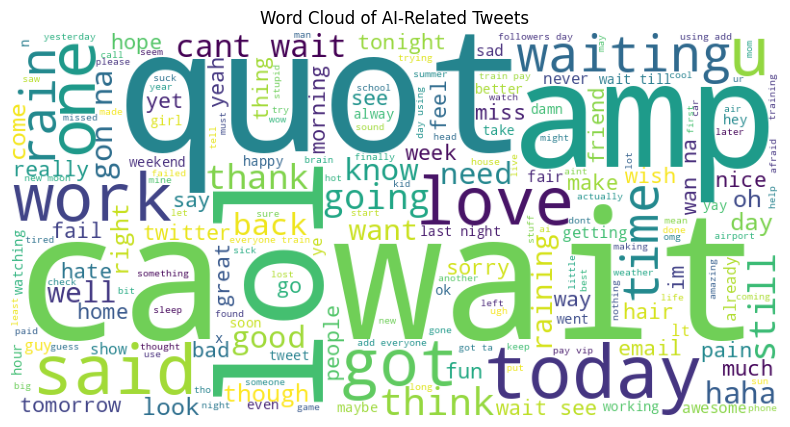

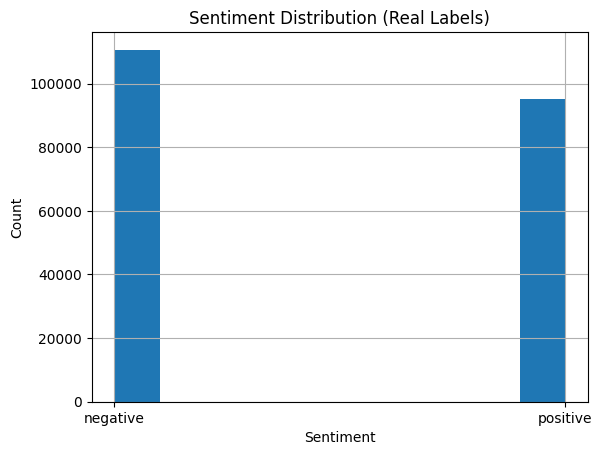

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud
text = ' '.join(df_ai['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of AI-Related Tweets')
plt.show()

# هیستوگرام احساسات
df_ai['sentiment'].hist()
plt.title('Sentiment Distribution (Real Labels)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [9]:
# محاسبه درصد احساسات
sentiment_dist = df_ai['sentiment'].value_counts(normalize=True) * 100

# چاپ گزارش
print("گزارش تحلیل توییت‌های مرتبط با AI:")
print(f"تعداد توییت‌ها: {len(df_ai)}")
print(f"درصد توییت‌های مثبت: {sentiment_dist.get('positive', 0):.2f}%")
print(f"درصد توییت‌های منفی: {sentiment_dist.get('negative', 0):.2f}%")
print("10 کلمه پرتکرار:")
print(word_counts.sum().sort_values(ascending=False).head(10))

گزارش تحلیل توییت‌های مرتبط با AI:
تعداد توییت‌ها: 205845
درصد توییت‌های مثبت: 46.25%
درصد توییت‌های منفی: 53.75%
10 کلمه پرتکرار:
wait    22222
get     14858
ca      14489
day     12090
quot    11999
got     11547
like    11433
go      11292
rain    10819
good     9939
dtype: int64
